In [76]:
import datetime
import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import numpy as np
import pandas as pd

In [77]:
pattern = re.compile(r".+([0-9]{4})([0-9]{2})([0-9]{2})\.xlsx")

In [93]:
name_excel = "../excel/tick_20250612.xlsx"
#ticker = "7011"
#ticker = "7203"
ticker = "8306"

m = pattern.match(name_excel)
if m:
    year = m.group(1)
    month = m.group(2)
    day = m.group(3)
else:
    year = "1970"
    month = "01"
    day = "01"
date_str = f"{year}-{month}-{day}"
df = pd.read_excel(name_excel, sheet_name=ticker)
df

,Time,Price
0,1.749686e+09,1962.5
1,1.749686e+09,1962.5
2,1.749686e+09,1963.5
3,1.749686e+09,1963.5
4,1.749686e+09,1964.0
...,...,...
19434,1.749709e+09,1957.0
19435,1.749709e+09,1957.0
19436,1.749709e+09,1957.0
19437,1.749709e+09,1957.0


In [94]:
df.index = pd.to_datetime([datetime.datetime.fromtimestamp(t) for t in df["Time"]])
df

,Time,Price
2025-06-12 09:00:04.334943,1.749686e+09,1962.5
2025-06-12 09:00:05.357378,1.749686e+09,1962.5
2025-06-12 09:00:06.333254,1.749686e+09,1963.5
2025-06-12 09:00:07.358513,1.749686e+09,1963.5
2025-06-12 09:00:08.361152,1.749686e+09,1964.0
...,...,...
2025-06-12 15:24:55.624711,1.749709e+09,1957.0
2025-06-12 15:24:56.629682,1.749709e+09,1957.0
2025-06-12 15:24:57.608449,1.749709e+09,1957.0
2025-06-12 15:24:58.611110,1.749709e+09,1957.0


In [95]:
# ローリングウィンドウサイズを設定 (秒単位)
# 例: 10秒間のRolling MAD
window_size = "60s" # '10s' = 10 seconds

# Rolling MAD の計算
# DataFrame.rolling().apply() を使う
# ここでは、ウィンドウ内の値の平均からの絶対偏差の平均を計算
df["rMAD"] = df["Price"].rolling(window=window_size).apply(
    lambda x: np.abs(x - x.mean()).mean(), raw=False
)
df

,Time,Price,rMAD
2025-06-12 09:00:04.334943,1.749686e+09,1962.5,0.000000
2025-06-12 09:00:05.357378,1.749686e+09,1962.5,0.000000
2025-06-12 09:00:06.333254,1.749686e+09,1963.5,0.444444
2025-06-12 09:00:07.358513,1.749686e+09,1963.5,0.500000
2025-06-12 09:00:08.361152,1.749686e+09,1964.0,0.560000
...,...,...,...
2025-06-12 15:24:55.624711,1.749709e+09,1957.0,0.370000
2025-06-12 15:24:56.629682,1.749709e+09,1957.0,0.372222
2025-06-12 15:24:57.608449,1.749709e+09,1957.0,0.363333
2025-06-12 15:24:58.611110,1.749709e+09,1957.0,0.352778


In [96]:
# ローリングウィンドウサイズを設定 (秒単位)
# 例: 1分間 (60秒) の価格レンジ
#window_size_range = "60s" # '60s' = 60 seconds

# Rolling Range の計算 (Max - Min)
df["rRange"] = df["Price"].rolling(window=window_size).apply(
    lambda x: x.max() - x.min(), raw=False
)
df

,Time,Price,rMAD,rRange
2025-06-12 09:00:04.334943,1.749686e+09,1962.5,0.000000,0.0
2025-06-12 09:00:05.357378,1.749686e+09,1962.5,0.000000,0.0
2025-06-12 09:00:06.333254,1.749686e+09,1963.5,0.444444,1.0
2025-06-12 09:00:07.358513,1.749686e+09,1963.5,0.500000,1.0
2025-06-12 09:00:08.361152,1.749686e+09,1964.0,0.560000,1.5
...,...,...,...,...
2025-06-12 15:24:55.624711,1.749709e+09,1957.0,0.370000,1.5
2025-06-12 15:24:56.629682,1.749709e+09,1957.0,0.372222,1.5
2025-06-12 15:24:57.608449,1.749709e+09,1957.0,0.363333,1.5
2025-06-12 15:24:58.611110,1.749709e+09,1957.0,0.352778,1.5


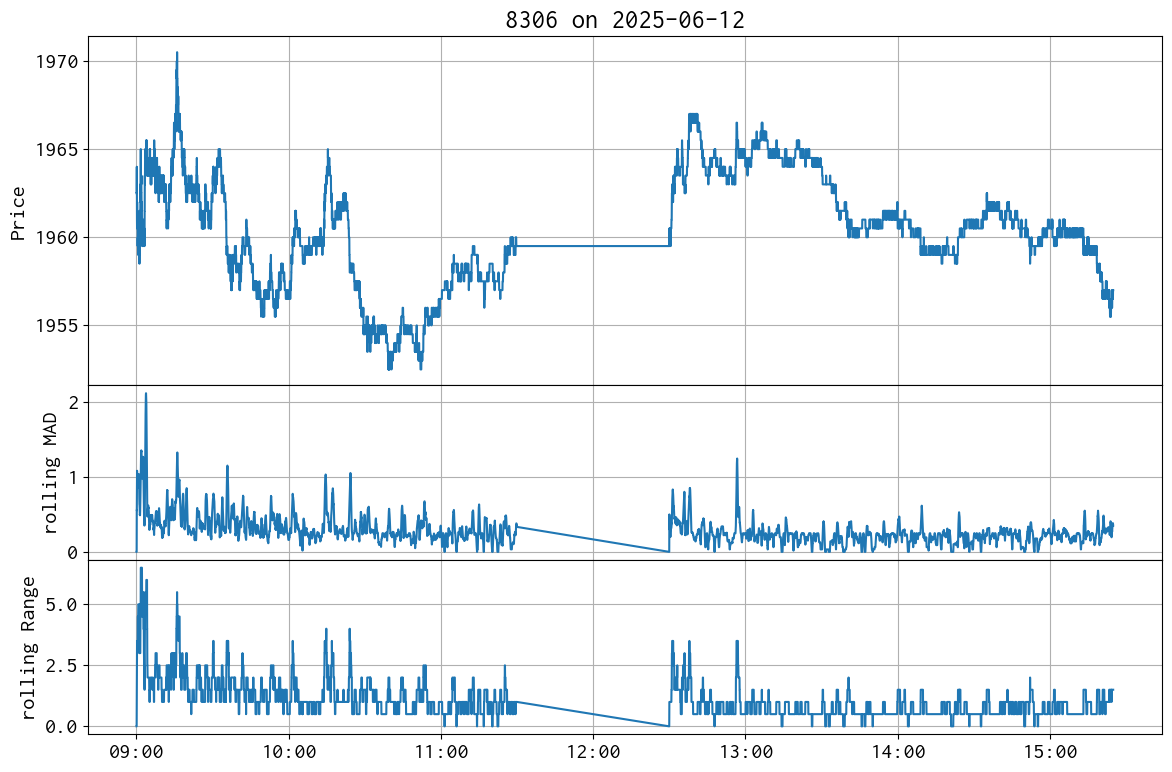

In [97]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 3
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

ax[0].plot(df["Price"])
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax[0].set_ylabel("Price")
ax[0].set_title(f"{ticker} on {date_str}")

ax[1].plot(df["rMAD"])
ax[1].set_ylabel("rolling MAD")

ax[2].plot(df["rRange"])
ax[2].set_ylabel("rolling Range")

plt.tight_layout()
plt.savefig(f"screenshots/tick_{ticker}_{date_str}.png" )
plt.show()